# Visualizing dyad

## Import all packages


In [78]:
import skimage
from skimage import img_as_float
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

## Load the image


Shape of the image: (512, 512).


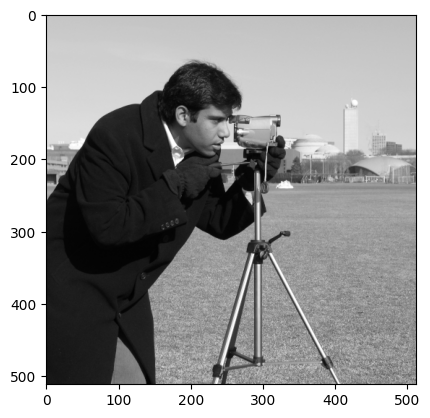

In [2]:
image = img_as_float(skimage.data.camera())
print(f"Shape of the image: {image.shape}.")
# Visualize the image
plt.imshow(image, cmap="gray")
plt.show()

## Compute the SVD

In [3]:
U, s, VT = np.linalg.svd(image, full_matrices=False)
print(U.shape, s.shape, VT.shape)
print(s)

(512, 512) (512,) (512, 512)
[2.78298176e+02 6.68807493e+01 5.22152965e+01 3.46565274e+01
 2.30377427e+01 1.70625345e+01 1.46238417e+01 1.36269750e+01
 1.33797692e+01 1.18849970e+01 1.06568790e+01 1.02626843e+01
 9.80407038e+00 8.61051117e+00 8.19417079e+00 8.06515051e+00
 7.18266413e+00 7.04399448e+00 6.70224552e+00 6.60635529e+00
 6.49673779e+00 6.16080293e+00 5.97681799e+00 5.79240103e+00
 5.65424795e+00 5.29116672e+00 5.01156401e+00 4.83507797e+00
 4.68413583e+00 4.45532693e+00 4.40116176e+00 4.16904056e+00
 4.12533396e+00 4.05023263e+00 3.93472548e+00 3.85463050e+00
 3.67555760e+00 3.59201878e+00 3.51228884e+00 3.47164435e+00
 3.38679663e+00 3.32993457e+00 3.26811214e+00 3.24184928e+00
 3.19585748e+00 3.14462402e+00 3.09830742e+00 3.08448888e+00
 3.05355715e+00 2.96955849e+00 2.92555459e+00 2.87556078e+00
 2.84522741e+00 2.78548681e+00 2.73322047e+00 2.68372565e+00
 2.66781909e+00 2.62513547e+00 2.53239067e+00 2.49916625e+00
 2.47573242e+00 2.45088372e+00 2.40908031e+00 2.33889004

## Visualize dyad

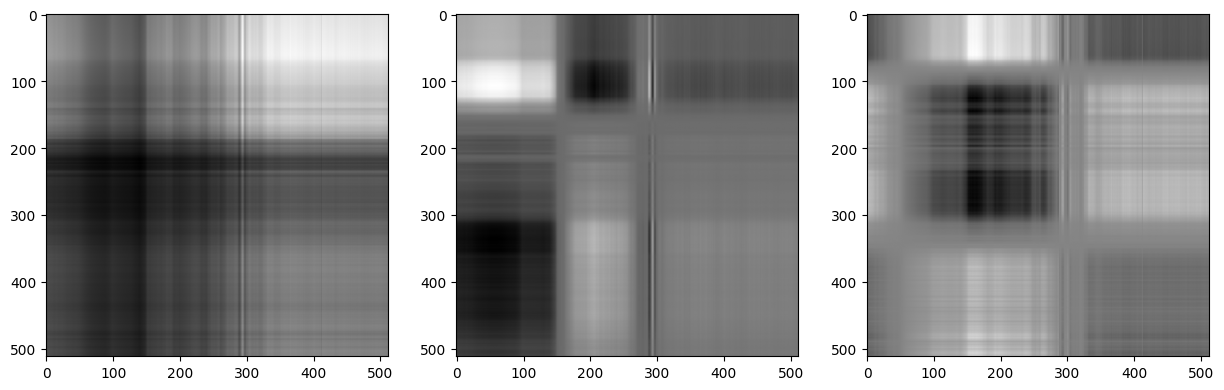

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    dyad = np.outer(U[:, i], VT[i, :])
    ax.imshow(dyad, cmap="gray")
plt.show()

## Plot singular values

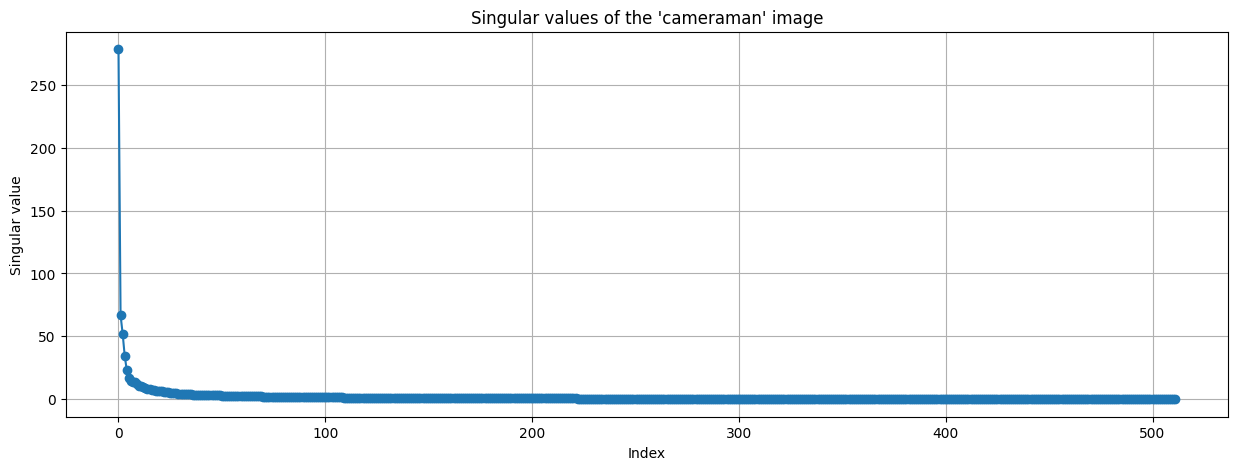

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(s,'-o' ,linewidth=1.5)
plt.title("Singular values of the 'cameraman' image")
plt.xlabel("Index")
plt.ylabel("Singular value")
plt.grid()
plt.show()

## K - rank approximation

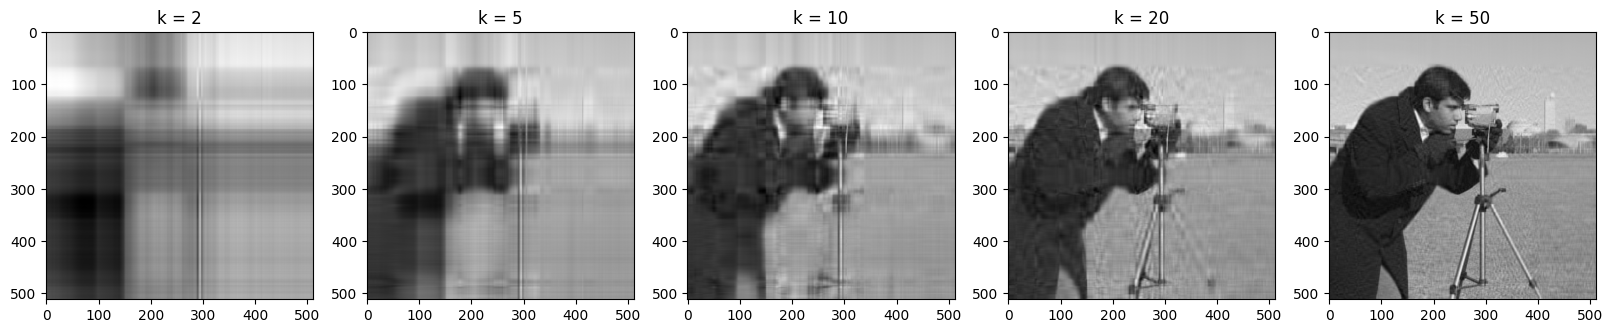

In [17]:
def k_rank(U,s,VT,k):
    return U[:,:k] @ np.diag(s[:k]) @ VT[:k,:]

k_values = [2,5,10,20,50]
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, k in enumerate(k_values):
    image_k = k_rank(U,s,VT,k)
    axes[i].imshow(image_k, cmap="gray")
    axes[i].set_title(f"k = {k}")
plt.show()

## Approximation error

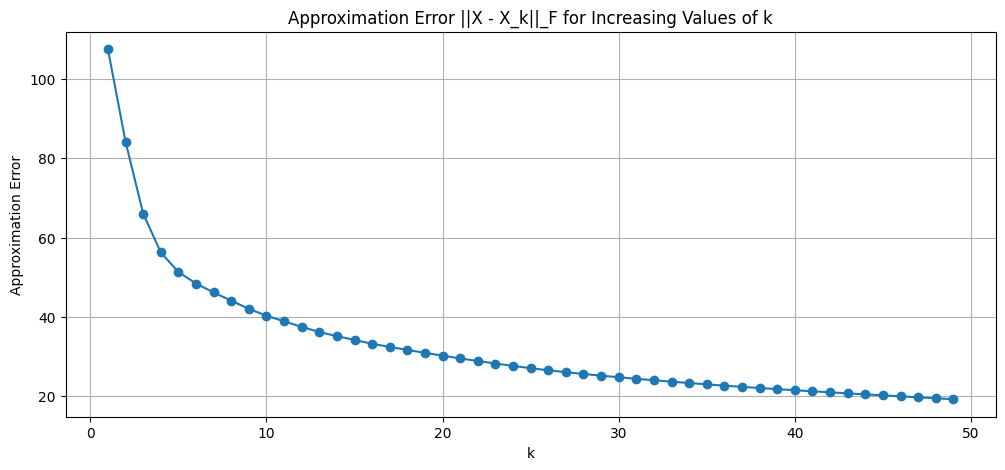

In [13]:
def approx_error(U,s,VT,k):
    x_k = k_rank(U,s,VT,k)
    return np.linalg.norm(image - x_k,'fro')

# Compute the approximation errors for different k values
k_values = range(1,50)
errors = [approx_error(U,s,VT,k) for k in k_values]

plt.figure(figsize=(12, 5))
plt.plot(k_values, errors, '-o', linewidth=1.5)
plt.title('Approximation Error ||X - X_k||_F for Increasing Values of k')
plt.xlabel('k')
plt.ylabel('Approximation Error')
plt.grid()
plt.show()


## Compression factor 

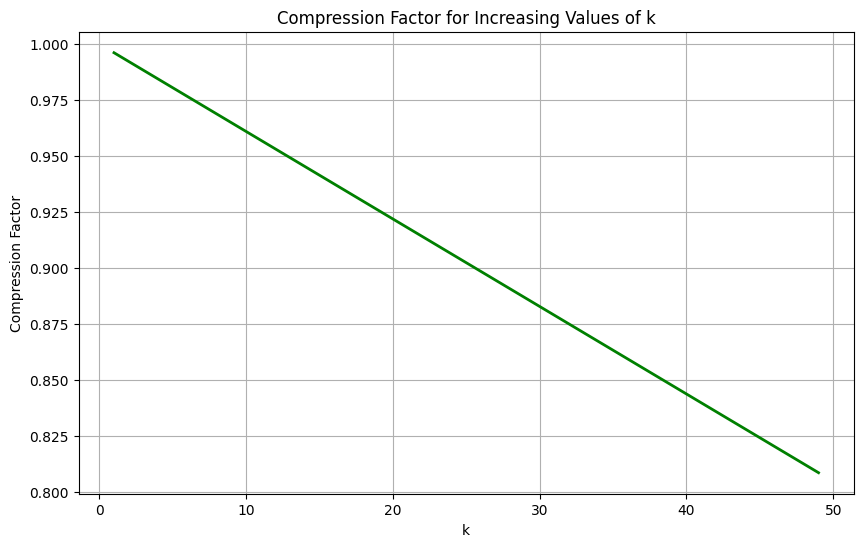

In [8]:
def compression_factor(m, n, k):
    return 1 - (k * (m + n + 1)) / (m * n)

# Get the dimensions of the image
m, n = image.shape

# Compute the compression factor for increasing values of k
compression_factors = [compression_factor(m, n, k) for k in k_values]

# Plot the compression factor
plt.figure(figsize=(10, 6))
plt.plot(k_values, compression_factors, 'g-', linewidth=2)
plt.title('Compression Factor for Increasing Values of k')
plt.xlabel('k')
plt.ylabel('Compression Factor')
plt.grid()
plt.show()


## Compute the k value s.t. $c_{k}=0$

In [12]:
k_zero_compression = m * n / (m + n + 1)

# Determine the approximation error for this value of k
error_zero_compression = approx_error(U, s, VT, int(k_zero_compression))

# Print the results
print(f"Value of k for zero compression factor: {int(k_zero_compression)}")
print(f"Approximation error for k = {int(k_zero_compression)}: {error_zero_compression}")

# Comment on the results
comment = """
The value of k for which the compression factor c_k is zero is approximately equal to the number of singular values required to represent the image without any compression. 
The approximation error for this value of k is expected to be very small, indicating that the k-rank approximation is very close to the original image.
"""
print(comment)

Value of k for zero compression factor: 255
Approximation error for k = 255: 3.209575380605604

The value of k for which the compression factor c_k is zero is approximately equal to the number of singular values required to represent the image without any compression. 
The approximation error for this value of k is expected to be very small, indicating that the k-rank approximation is very close to the original image.



# Classification of MNIST Digits with SVD Decomposition

## Seperate test and training data

#

(784, 42000) (42000,)


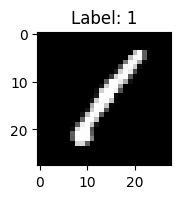

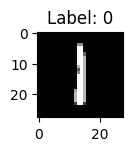

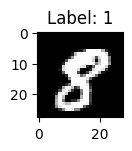

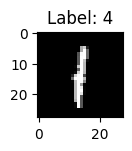

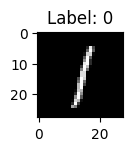

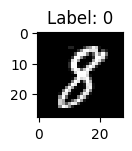

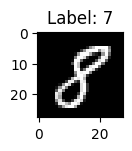

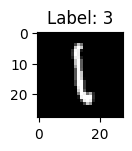

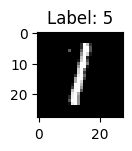

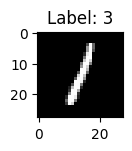

Accuracy: 96.00% for the first test


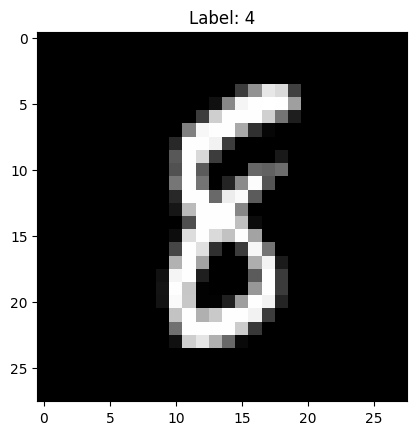

Predicted: 1, Actual: 8


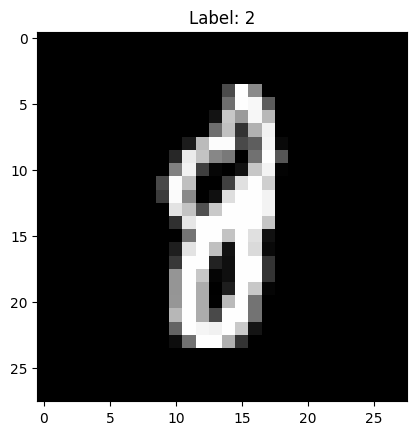

Predicted: 1, Actual: 8


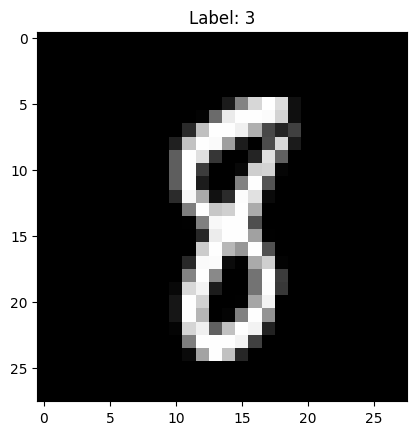

Predicted: 1, Actual: 8


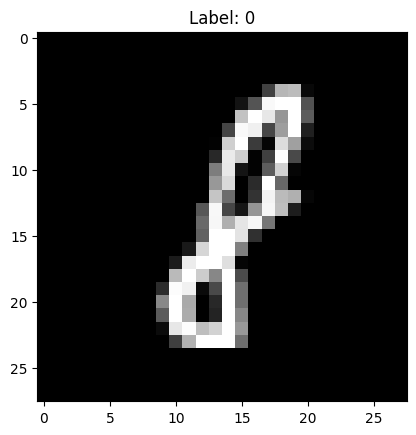

Predicted: 1, Actual: 8


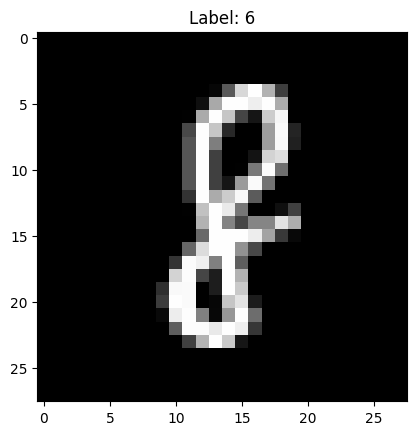

Predicted: 1, Actual: 8


In [82]:
data = pd.read_csv("data/train.csv")
data.shape
# Convert data into a matrix
data = np.array(data)
# X is dimension (42000, 784)
# Y is dimension (42000, )
n1 = 1
n2 = 8
X = data[:, 1:]
X = X.T

Y = data[:, 0]
print(X.shape, Y.shape)
d, N = X.shape

# Visualize the image 
def visualize_image(X, index):
    image = X[:, index].reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {Y[index]}")
    plt.show()
    
# Filter digits 3 and 4
indices = np.where((Y == n1) | (Y == n2))[0]
X_filtered = X[:, indices]
Y_filtered = Y[indices]
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    visualize_image(X_filtered, i)
#plt.show()
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered.T, Y_filtered, test_size=0.2, random_state=42)

X_train = X_train.T
X_test = X_test.T

X1 = X_train[:, Y_train == n1]
X2 = X_train[:, Y_train == n2]

U1, s1, VT1 = np.linalg.svd(X1, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2, full_matrices=False)

# Classify the digits
def classify_digit(x):
    x1_perp = U1 @ (U1.T @ x)
    x2_perp = U2 @ (U2.T @ x)
    d1 = np.linalg.norm(x - x1_perp)
    d2 = np.linalg.norm(x - x2_perp)
    return n1 if d1 < d2 else n2

#test the classifier
predictions = [classify_digit(X_test[:, i]) for i in range(X_test.shape[1])]
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}% for the first test")

# Visualize some misclassified examples
misclassified_indices = np.where(predictions != Y_test)[0]
for idx in misclassified_indices[:5]:
    visualize_image(X_test, idx)
    print(f"Predicted: {predictions[idx]}, Actual: {Y_test[idx]}")
    # Filter digits 5 and 6
    #

# # Repeat the experiment for different digits
# mask_01 = (Y == 7) | (Y == 8)
# X_filtered_01 = X[:, mask_01]
# Y_filtered_01 = Y[mask_01]

# X_train_01, X_test_01, Y_train_01, Y_test_01 = train_test_split(X_filtered_01.T, Y_filtered_01, test_size=0.2, random_state=42)
# X_train_01 = X_train_01.T
# X_test_01 = X_test_01.T

# X1_01 = X_train_01[:, Y_train_01 == 7]
# X2_01 = X_train_01[:, Y_train_01 == 8]

# U1_01, S1_01, V1_01 = np.linalg.svd(X1_01, full_matrices=False)
# U2_01, S2_01, V2_01 = np.linalg.svd(X2_01, full_matrices=False)

# def classify_digit_01(x):
#     x1_perp = U1_01 @ (U1_01.T @ x)
#     x2_perp = U2_01 @ (U2_01.T @ x)
#     d1 = np.linalg.norm(x - x1_perp)
#     d2 = np.linalg.norm(x - x2_perp)
#     return 0 if d1 < d2 else 1

# predictions_01 = [classify_digit_01(X_test_01[:, i]) for i in range(X_test_01.shape[1])]
# accuracy_01 = accuracy_score(Y_test_01, predictions_01)
# print(f"Accuracy for digits 0 and 1: {accuracy_01 * 100:.2f}%")




# PCA


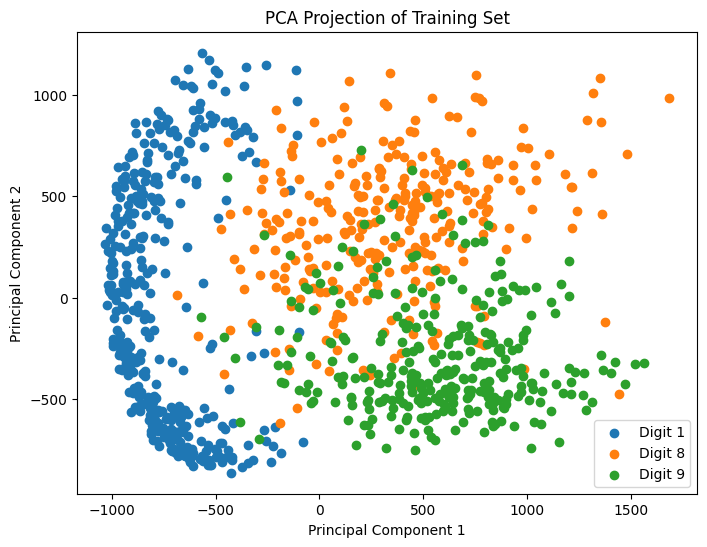

Average distances from centroids: {1: np.float64(308.67016764835626), 8: np.float64(312.50322029540706), 9: np.float64(281.97581189495105)}
Test set average distances from centroids: {1: np.float64(313.09807893074685), 8: np.float64(314.1771638614808), 9: np.float64(276.4887565255573)}
Misclassification rate: 7.91%
Misclassification rate for k=2: 12.97%
Misclassification rate for k=3: 14.53%
Misclassification rate for k=5: 7.91%
Misclassification rate for k=10: 7.31%
Misclassification rate for k=20: 7.05%


In [86]:
data = pd.read_csv("data/train.csv")
data = np.array(data)
X = data[:, 1:].T
Y = data[:, 0]

digits = [1,8,9]
mask = np.isin(Y, digits)
X_filtered = X[:, mask]
Y_filtered = Y[mask]

N_train = 1000
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered.T, Y_filtered, train_size=N_train, random_state=42)
X_train = X_train.T
X_test = X_test.T

# Perform PCA
k = 5
pca = PCA(n_components=k)
Z_train = pca.fit_transform(X_train.T).T

# Visualize the results
plt.figure(figsize=(8, 6))
for digit in digits:
    indices = np.where(Y_train == digit)
    plt.scatter(Z_train[0, indices], Z_train[1, indices], label=f'Digit {digit}')
plt.legend()
plt.title('PCA Projection of Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Compute centroids
centroids = {}
for digit in digits:
    indices = np.where(Y_train == digit)
    centroids[digit] = np.mean(Z_train[:, indices], axis=2).flatten()

# Compute average distance from centroid
avg_distances = {}
for digit in digits:
    indices = np.where(Y_train == digit)
    distances = np.linalg.norm(Z_train[:, indices].T - centroids[digit], axis=1)
    avg_distances[digit] = np.mean(distances)
print("Average distances from centroids:", avg_distances)

# Project test set
Z_test = pca.transform(X_test.T).T

# Compute average distance to centroids for test set
test_avg_distances = {}
for digit in digits:
    indices = np.where(Y_test == digit)
    distances = np.linalg.norm(Z_test[:, indices].T - centroids[digit], axis=1)
    test_avg_distances[digit] = np.mean(distances)
print("Test set average distances from centroids:", test_avg_distances)

def classify_digit(x):
    distances = {digit: np.linalg.norm(x - centroids[digit]) for digit in digits}
    return min(distances, key=distances.get)

# Test the classifier
predictions = [classify_digit(Z_test[:, i]) for i in range(Z_test.shape[1])]
accuracy = accuracy_score(Y_test, predictions)
print(f"Misclassification rate: {100 - accuracy * 100:.2f}%")

# Repeat the experiment for different values of k and different digits
ks = [2, 3,5,10,20]
for k in ks:
    pca = PCA(n_components=k)
    Z_train = pca.fit_transform(X_train.T).T
    Z_test = pca.transform(X_test.T).T

    # Compute centroids
    centroids = {}
    for digit in digits:
        indices = np.where(Y_train == digit)
        centroids[digit] = np.mean(Z_train[:, indices], axis=2).flatten()

    # Define classification algorithm
    def classify_digit(x):
        distances = {digit: np.linalg.norm(x - centroids[digit]) for digit in digits}
        return min(distances, key=distances.get)

    # Test the classifier
    predictions = [classify_digit(Z_test[:, i]) for i in range(Z_test.shape[1])]
    accuracy = accuracy_score(Y_test, predictions)
    print(f"Misclassification rate for k={k}: {100 - accuracy * 100:.2f}%")